In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

import wx
import eyed3
import glob

In [2]:
from dash import Dash, html, dcc
import plotly.express as px
from PIL import Image
import os
from collections import Counter

In [3]:
vis_df = pd.read_excel("sample_dataFrame.xlsx")
vis_df

,Title,Authors,Year,Abstract,Species,sex,age_range,trt_age,trts,trt_cat,trt_size,sample_size,scanner,neuroimaging,study_type
0,A three-dimensional digital segmented and defo...,"Stéphan Saikali a,∗, Paul Meuriceb, Paul Saule...",2010,We used high-magnetic field (4.7 T) magnetic r...,pig,male,0.5,NaN,NaN,NaN,NaN,5,4.7,T2,atlas_curation
1,Resting-state fMRI changes in Alzheimer's dise...,"Maja A.A. Binnewijzend a, Menno M. Schoonheim ...",2012,Regional functional connectivity (FC) of 39 pa...,human,both,NaN,NaN,3.0,"AD, MCI, CON","39, 23, 43",105,1.5,"resting state fMRI,T1-weighted",experiment


In [18]:
icon_dir = '\\Users\\loret\\OneDrive\\Documents\\MRI\\Neurohackademy_2024\\neuroimaging_icons'
icon_dir

'\\Users\\loret\\OneDrive\\Documents\\MRI\\Neurohackademy_2024\\neuroimaging_icons'

In [1]:
class NeuroFrame(wx.Frame):
    def __init__(self):
        super().__init__(parent=None, title = 'Sample data', size = (800, 600))
        panel = wx.Panel(self)
        main_sizer = wx.BoxSizer(wx.VERTICAL)
        self.icon_dir = icon_dir

        self.icon_mapping = {
            'T2': 'T2',
            'resting state fMRI': 'fmri',
            'T1-weighted' : 'T1'
        }

        self.get_data()
        self.load_icon()
        self.plot_nm_w_icons()
        self.assignIcon()

    def get_data(self):
        self.vis_df = pd.read_excel("sample_dataFrame.xlsx")
        return self.vis_df
        
    def load_icon(self, icon_name):
        icon_path = os.path.join(self.icon_dir, f'{icon_name}.png')
        print(f"Loading icon from: {icon_path}")
        return Image.open(icon_path)

    def plot_nm_w_icons(self, title, neuroimaging_data):
        nm_list = neuroimaging_data.split(",")
        nm_count = len(nm_list)
        print(nm_list)
        
        fig, ax = plt.subplots(1, nm_count, figsize = (2 * nm_count, 2), tight_layout = True)
        fig.suptitle("Neuroimaging Modalities", fontsize = 12)
        for i, nm in enumerate(nm_list): # for each imaging modality
            icon = self.load_icon(self.icon_mapping[nm]) 
            if nm_count > 1:   
                ax_handle = ax.flat[i]
            else: 
                ax_handle = ax
            ax_handle.imshow(icon, aspect = "auto")
            ax_handle.axis("off")
        print()
    
    def assignIcon(self):
         for index, row in vis_df.iterrows():
            title = row['Title']
            neuroimaging_data = row['neuroimaging']
            print(title)
            print(neuroimaging_data)
            self.plot_nm_w_icons(self, title, neuroimaging_data)

class MyApp(wx.App):
    def OnInit(self):
        frame = NeuroFrame(None, title='Excel Data Displayed')
        frame.Show()
        return True

if __name__ == "__main__":
    app = MyApp(False)
    app.MainLoop()

NameError: name 'wx' is not defined

A three-dimensional digital segmented and deformable brain atlas of the domestic pig
T2
['T2']
Loading icon from: \Users\loret\OneDrive\Documents\MRI\Neurohackademy_2024\neuroimaging_icons\T2.png

Resting-state fMRI changes in Alzheimer's disease and mild cognitive impairment
resting state fMRI,T1-weighted
['resting state fMRI', 'T1-weighted']
Loading icon from: \Users\loret\OneDrive\Documents\MRI\Neurohackademy_2024\neuroimaging_icons\fmri.png
Loading icon from: \Users\loret\OneDrive\Documents\MRI\Neurohackademy_2024\neuroimaging_icons\T1.png



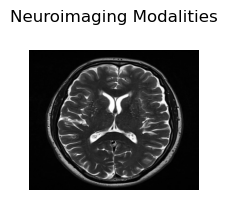

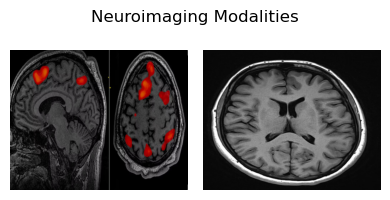

In [7]:
#we will need to change vis_df.iterrows to var row_num that will calculate the number of rows within the populated dataframe
for index, row in vis_df.iterrows():
    title = row['Title']
    neuroimaging_data = row['neuroimaging']
    print(title)
    print(neuroimaging_data)
    plot_nm_w_icons(title, neuroimaging_data)


A three-dimensional digital segmented and deformable brain atlas of the domestic pig
T2
['T2']
Loading icon from: \Users\loret\OneDrive\Documents\MRI\Neurohackademy_2024\neuroimaging_icons\T2.png

Resting-state fMRI changes in Alzheimer's disease and mild cognitive impairment
resting state fMRI,T1-weighted
['resting state fMRI', 'T1-weighted']
Loading icon from: \Users\loret\OneDrive\Documents\MRI\Neurohackademy_2024\neuroimaging_icons\fmri.png
Loading icon from: \Users\loret\OneDrive\Documents\MRI\Neurohackademy_2024\neuroimaging_icons\T1.png



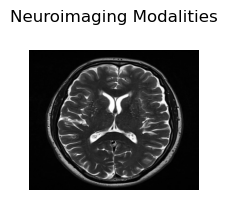

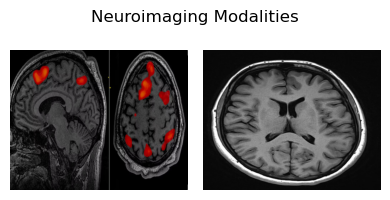

In [11]:
class MyFrame(wx.Frame):
    def __init__(self):
        super().__init__(parent=None, title = 'Sample data', size = (800, 600))
        panel = wx.Panel(self)

    
        self.Show()

if __name__ == '__main__':
    app5 = wx.App()
    frame = MyFrame()
    app5.MainLoop()

In [5]:
class NeuroPanel(wx.Panel):
    def __init__(self, parent):
        super().__init__(parent)
        main_sizer = wx.BoxSizer(wx.VERTICAL)
        self.neuro_data = {}
        #self.icon_dir = icon_dir

        #self.icon_mapping = {
        #    'T2': 'T2',
        #    'resting state fMRI': 'fmri',
        #    'T1-weighted' : 'T1'
        #}
        self.list_ctrl = wx.ListCtrl(
            self, size = (-1, 100),
            style = wx.LC_REPORT | wx.BORDER_SUNKEN
        )

        self.list.ctrl.InsertColumn(0, 'Title', width = 140)
        self.list.ctrl.InsertColumn(1, 'Summary', width = 140)
        self.list.ctrl.InsertColumn(2, 'Descriptive Statistics', width = 200)
        main_sizer.Add(self.list_ctrl, 0, wx.ALL | wx.EXPAND, 5)
        self.SetSizer(main_sizer)

    def on_edit(self, event):
        print('in on_edit')

    def update_neuro_info(self, folder_path):
        print(folder_path)

class NeuroFrame(wx.Frame):
    def __init__(self):
        super().__init__(parent = None, title = 'Showing Neuro Data')
        self.panel = NeuroPanel(self)
        self.Show()

if __name__ == '__main__':
    app = wx.App(False)
    frame = NeuroFrame()
    app.MainLoop()

PyNoAppError: The wx.App object must be created first!

In [31]:
class NeuroFrame(wx.Frame):
    def __init__(self):
        super().__init__(parent=None)
        self.panel = NeuroFrame(self)
        self.Show()

class MyApp(wx.App):
    def OnInit(self):
        frame = NeuroFrameFrame(None, title='Excel Data Graph')
        frame.Show()
        return True

if __name__ == '__main__':
    app = wx.App(False)
    frame = NeuroFrame()
    app.MainLoop()

PyNoAppError: The wx.App object must be created first!